In [521]:
#Import the standard libraries that are required for reading data and analysis.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [522]:
##Read the data loan.csv into dataframe called df_loan

df_loan = pd.read_csv('loan.csv')

In [523]:
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", None)
pd.set_option('display.width', None)

In [524]:
df_loan.shape

(39717, 111)

In [525]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


<b> <font size = "10" > Data Cleaning </font> </b>

In [526]:
# Let us Check columns and check for null value counts.

df_loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [527]:
#Drop the columns which have null value for all the rows using dropna method

df_loan = df_loan.dropna(axis='columns', how ='all')

In [528]:
## There were 54 columns which had null value for all the rows. 
## These columns do not provide any information or value for the analysis.
df_loan.shape

(39717, 57)

In [529]:
## Let us analyse the remaining columns for null values.
df_loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [530]:
#drop the columns which has no impact in analysis and having more number of null values
df_loan.drop(['next_pymnt_d','desc','mths_since_last_record','mths_since_last_delinq'],axis=1,inplace=True)

In [531]:
df_loan.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [532]:
## Let us check if any column has only one unique value(Excluding null)
## These columns can be safely dropped from the analysis since they do not offer any value in the analysis. 

null_col_list = list(df_loan.columns[df_loan.nunique() == 1])
print(null_col_list)
print(len(null_col_list))

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
9


In [533]:
## ## There are 9 such columns and we shall drop those columns from the dataframe df_loan

df_loan.drop(null_col_list,axis=1,inplace=True)

In [534]:
df_loan.shape

(39717, 44)

In [535]:
df_loan.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2459
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
url                           0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prnc

In [536]:
## Let us impute the categorical variables to unknown
## Below are the catergorical columns that have null values. 
##   emp_title
##   emp_length
##   title
df_loan['emp_title'] = df_loan['emp_title'].fillna('unknown')
df_loan['emp_length'] = df_loan['emp_length'].fillna("0 Years")
df_loan['title'] = df_loan['title'].fillna('unknown')

In [537]:
## Loan Status in the target variable column
## Checking the types of values in loan_status

df_loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [538]:
## Removing the loans that are ongoing as there is no difinite outcome for them

df_loan = df_loan[df_loan.loan_status != "Current"]

In [539]:
## Changing the intrest rate (int_rate) column from type object to float

df_loan.int_rate.describe()

count      38577
unique       370
top       10.99%
freq         913
Name: int_rate, dtype: object

In [540]:
df_loan.int_rate = df_loan.int_rate.apply(lambda x : float(x.replace("%","")))

In [541]:
## Changing the employee length(emp_length) column from type object to integer
df_loan.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
0 Years      1033
Name: emp_length, dtype: int64

In [542]:
## Custom function to remove all the characters drom emp_length column

def convertEmpLengthToInt(emp_length):
    x = emp_length.strip()
    x = emp_length.replace("years", "")
    x = x.replace("Years", "")
    x = x.replace("year", "")
    x = x.replace("+","")
    x = x.replace("<","")
    return int(x)

In [543]:
df_loan.emp_length = df_loan.emp_length.apply(lambda x: convertEmpLengthToInt(x))

In [544]:
## Dividing the Loan date(issue_d) column into year and month

df_loan.issue_d.value_counts()

Nov-11    2062
Dec-11    2042
Oct-11    1941
Sep-11    1913
Aug-11    1798
Jul-11    1745
Jun-11    1728
May-11    1609
Apr-11    1559
Mar-11    1442
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

In [545]:
def getMonth(issue_d):
    x = issue_d.split("-")    
    return x[0]

def getYear(issue_d):
    x = issue_d.split("-")    
    return (int(x[1]) + 2000)

In [546]:
## Getting Month from the issue date of the loan

df_loan["issue_month"] = df_loan.issue_d.apply(lambda x: getMonth(x))

In [547]:
## Getting Year from the issue date of the loan

df_loan["issue_year"] = df_loan.issue_d.apply(lambda x: getYear(x))

In [548]:
## Creating bins for continous variables

df_loan["loan_amnt_bins"] = pd.cut(df_loan.loan_amnt, 7)
df_loan["int_rate_bins"] = pd.cut(df_loan.int_rate, 7)
df_loan["dti_bins"] = pd.cut(df_loan.dti, 7)

In [549]:
df_loan["annual_inc_bins"] = pd.qcut(df_loan.annual_inc, 7)

In [550]:
## Rounding off interest rate values in bins

df_loan.int_rate_bins = df_loan.int_rate_bins.apply(lambda x: pd.Interval(left=round(x.left,2), right=round(x.right,2)))

In [551]:
## Rounding off DTI values in bins

df_loan.dti_bins = df_loan.dti_bins.apply(lambda x: pd.Interval(left=round(x.left,2), right=round(x.right,2)))

In [552]:
## Rounding off income values in bins

df_loan.annual_inc_bins = df_loan.annual_inc_bins.apply(lambda x: pd.Interval(left=int(round(x.left)), right=int(round(x.right))))

In [553]:
## Rounding off Loan Amount in bins

df_loan.loan_amnt_bins = df_loan.loan_amnt_bins.apply(lambda x: pd.Interval(left=int(round(x.left)), right=int(round(x.right))))

<b> <font size = "10" > Data Analysis </font> </b>

# Univariate Analysis 

In [554]:
## list of Important variables (Columns) for univariate analysis


# loan_status
# term
# grade
# sub grade
# int_rate
# Home Ownership
# title
# annnual_inc
# loan_amnt
# dti
# emp_length
# purpose
# Verification status
# issue_dt 

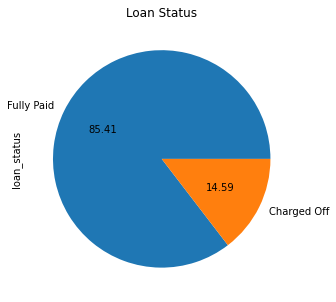

In [562]:
## Loan Status
plt.rcParams["figure.figsize"] = (5,5)
df_loan['loan_status'].value_counts().plot(kind='pie',title='Loan Status', autopct='%.2f')

plt.show()

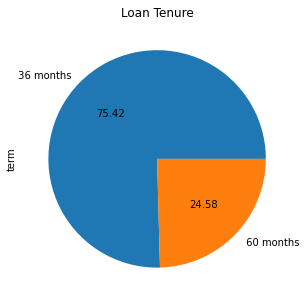

In [563]:
## Let us explore the Loan tenure(term column)
## The term refers to the tenur for which the correspoding loan has been taken. 

df_loan['term'].value_counts().plot(kind='pie',title='Loan Tenure', autopct='%.2f')
plt.show()

<b><u>Observations : </b></u>  
    There are only two tenures for which the loan has been granted. 
    75.42% of loans has been provided for 36 months
    26.74% of loans has been provided for 60 months

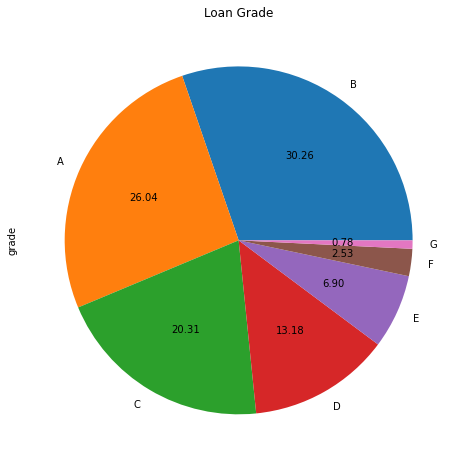

In [564]:
## Let us explore the grade column.
df_loan['grade'].value_counts().plot(kind='pie',title='Loan Grade', autopct='%.2f', figsize = (10,8))
plt.show()

###### <b><u>Observations : </b></u>  
Grade A has the highest share of 26.04% among all.
Barring grade B , there is a clear trend that number of loan decreases as grade decreases from A to F.
Only grade B has higher % than A.

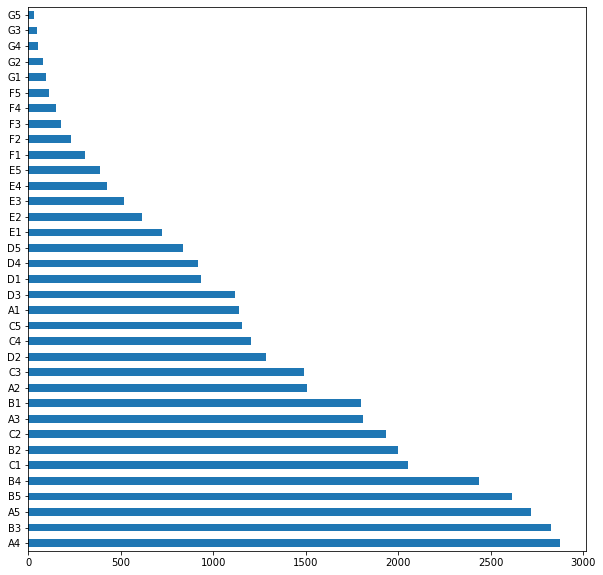

In [565]:
## Let us explore subgrade

df_loan.sub_grade.value_counts().plot.barh(figsize = (10,10))
plt.show()

<b><u>Observations : </b></u>  
The number of decreases as the grades changes from A to G
Most number of loans are in A,B, and C Grade

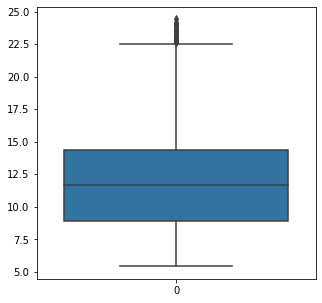

In [566]:
## Let us explore int_rate which is the interest rate charged for each loan. 

df_loan['int_rate'] = df_loan['int_rate'].apply( lambda x: float(str(x).strip('%')))
sns.boxplot(data=df_loan.int_rate)
plt.show()

<b><u>Observations : </b></u>  
Majority of the loans are offered at interest varying from 10-15 % per annum


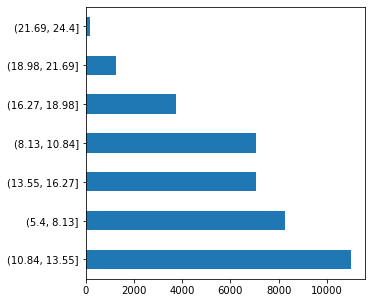

In [568]:
## Analysis on bins for intrest rate

df_loan.int_rate_bins.value_counts().plot.barh()
plt.show()

<b><u>Observations : </b></u>  
From the bar graph above, majority of loans were offered between 10.84% - 13.55%
Typically, higher interest rates will be charged on 
   unsecured loans 
   Borrowers with lower credit rating. 

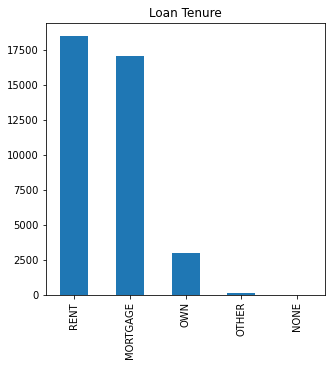

In [569]:
## Let us explore home_ownership column to see how the borrowers are distributed in owning a home. 

df_loan['home_ownership'].value_counts().plot(kind='bar',title='Loan Tenure')
plt.show()

<b><u>Observations : </b></u>  
Most of applicants are staying in either rent or mortgage houses


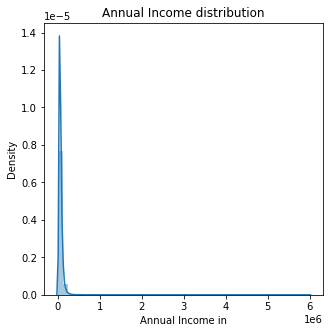

In [570]:
ax = sns.distplot(x=df_loan['annual_inc'])
ax.set(xlabel='Annual Income')
plt.xlabel('Annual Income in')

ax.set_title('Annual Income distribution')
plt.show()

<b><u>Observations : </b></u>  
Most of applicants are earning between beteen 50000 to 60000 USD.
Very few applicdants are earning more than 60000 USD. 
The maximum salary is 6M USD.


In [571]:
df_loan['annual_inc'].value_counts()

60000.00      1466
50000.00      1029
40000.00       855
45000.00       811
30000.00       808
75000.00       786
65000.00       779
70000.00       714
48000.00       696
80000.00       636
55000.00       631
36000.00       614
42000.00       591
90000.00       548
35000.00       508
100000.00      498
120000.00      482
85000.00       472
72000.00       471
24000.00       401
52000.00       382
54000.00       359
110000.00      307
95000.00       275
62000.00       262
25000.00       247
78000.00       241
38000.00       237
150000.00      223
32000.00       216
58000.00       211
130000.00      209
96000.00       202
125000.00      202
56000.00       202
43000.00       200
66000.00       198
105000.00      196
68000.00       192
53000.00       188
63000.00       187
57000.00       181
51000.00       181
33000.00       180
84000.00       178
37000.00       172
47000.00       160
140000.00      160
44000.00       159
38400.00       153
46000.00       149
115000.00      146
39000.00    

<AxesSubplot:>

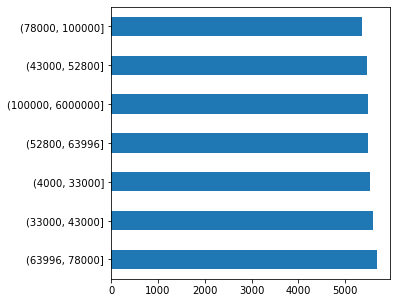

In [572]:
## Because of using Qcut, equal size bins are created

df_loan.annual_inc_bins.value_counts().plot.barh()

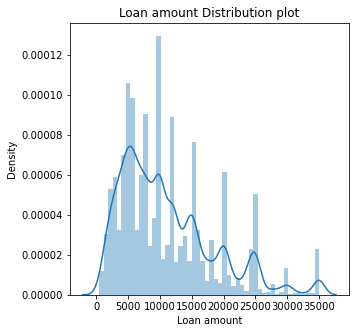

In [573]:
## Let us explore Loan Amount column to see the amount of loan that was given to the applicants 

df_loan['loan_amnt'].describe()
ax = sns.distplot(x=df_loan['loan_amnt'])
ax.set(xlabel='Loan Amount')
plt.xlabel('Loan amount')

ax.set_title('Loan amount Distribution plot')
plt.show()

<b><u>Observations : </b></u>  
Maximum loan application was for 35000 USD so far. 


<AxesSubplot:>

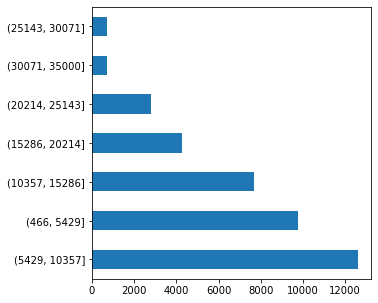

In [574]:

df_loan.loan_amnt_bins.value_counts().plot.barh()

<b><u>Observations : </b></u>  
Loan amount typically varies mostly between 5429 - 10357
Majority of the loans are for 10,000 USD
Loan amount above 25,000 USD are very few.

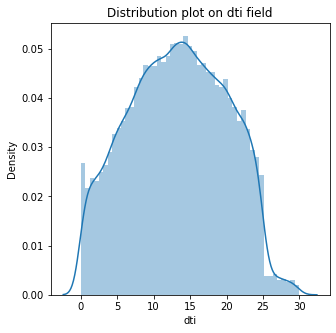

In [575]:
## Let us explore DTI column to see the debt to income ratio of the applicants

ax = sns.distplot(x=df_loan['dti'])
ax.set(xlabel='dti')


ax.set_title('Distribution plot on dti field')
plt.show()

<b><u>Observations : </b></u>  
The distribution on dti(Debt to Income Ratio) is approximately distributed as normal curve with mean around 15

<AxesSubplot:>

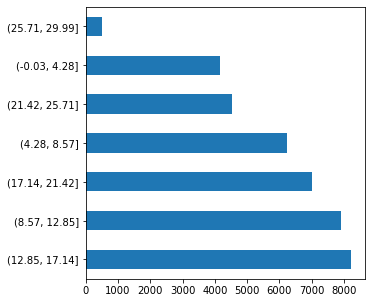

In [576]:
df_loan.dti_bins.value_counts().plot.barh()

<b><u>Observations : </b></u>  
The distribution on dti(Debt to Income Ratio) is approximately distributed as normal curve with 15 being the highest

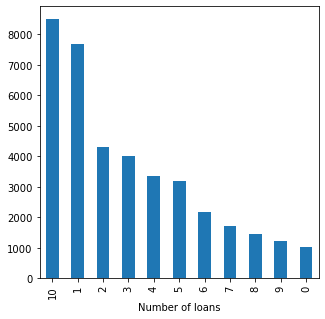

In [577]:
## Let us explore emp_length column to see the experience of the applicants

df_loan.emp_length.value_counts().plot.bar()
plt.xlabel("Employee Experience")
plt.xlabel("Number of loans")
plt.show()

<b><u>Observations : </b></u>  
The number of loans given for experice of 10 years are more followed by 1 year experince which specifies and uneven trend

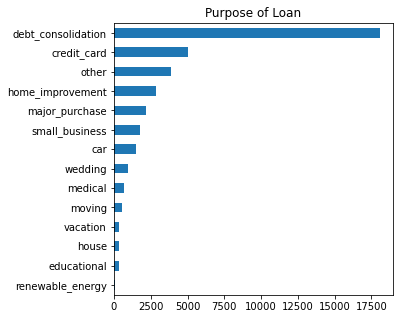

In [578]:
## Let us explore purpose column to see the purpose of the loan

df_loan['purpose'].value_counts().sort_values().plot(kind='barh',title='Purpose of Loan')
plt.show()

<b><u>Observations : </b></u>  
Majority of the loan has been requested for debt consolidation followed by credit card and others. 

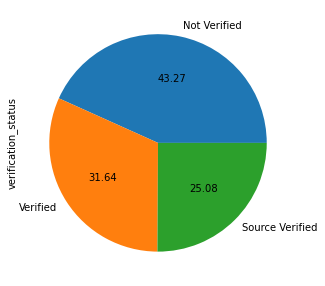

In [579]:
## Let us explore verification_status column to see if the number of loans that were verified

df_loan.verification_status.value_counts().plot.pie(autopct='%.2f')
plt.show()

<b><u>Observations : </b></u>  
As the pie chart indicatesm most of the loan applicants were not verified

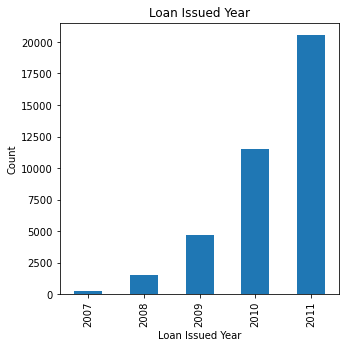

In [580]:

df_loan["issue_year"].value_counts().sort_values().plot.bar()

plt.title('Loan Issued Year')
plt.xlabel('Loan Issued Year')
plt.ylabel('Count')
plt.show()


<b><u>Observations : </b></u>  
The number of loans is growing significantly since 2007.

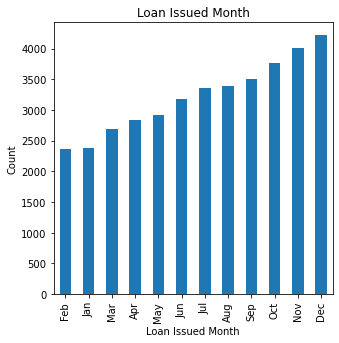

In [581]:

df_loan["issue_month"].value_counts().sort_values().plot.bar()

plt.title('Loan Issued Month')
plt.xlabel('Loan Issued Month')
plt.ylabel('Count')
plt.show()


<b><u>Observations : </b></u>  
Jand Feb has lowest loan disbursals.
Nov and Dec has the highest loan disbursals.


<b> <font size = "10" > Segmented Univariate Analysis </font> </b>

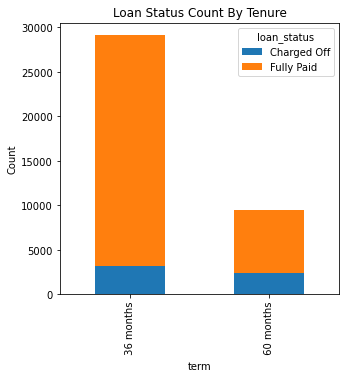

In [604]:
## Analysing the Term field(Loan Tenure in  Years) of the loan.


df_loan.groupby("term")["loan_status"].value_counts().unstack().plot.bar(stacked = True)
plt.title('Loan Status Count By Tenure')
plt.ylabel('Count')
plt.show()

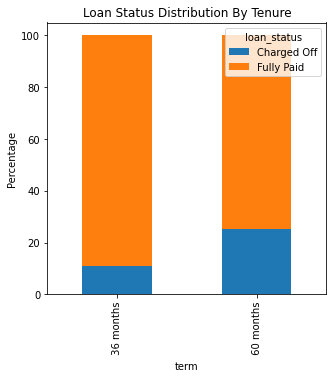

In [584]:
temp = df_loan.groupby(['term'])['loan_status'].value_counts().unstack()
temp = temp.divide(temp.sum(axis=1) / 100, axis=0)

temp.plot(kind="bar", stacked=True)
plt.title('Loan Status Distribution By Tenure')
plt.ylabel('Percentage')
plt.show()

<b><u>Observations : </b></u>  
As the above bar graph indicates, the proportion of people who charged off are more in 60 months tenure than 36 months

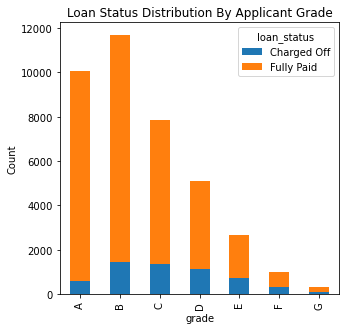

In [585]:
## Grade

df_loan.groupby("grade")["loan_status"].value_counts().unstack().plot.bar(stacked = True)
plt.title('Loan Status Distribution By Applicant Grade')
plt.ylabel('Count')
plt.show()

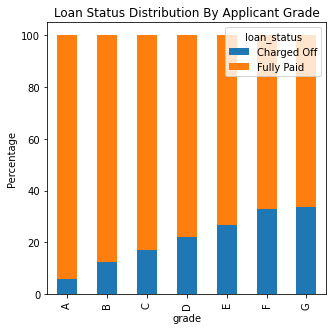

In [586]:
temp = df_loan.groupby(['grade'])['loan_status'].value_counts().unstack()
temp = temp.divide(temp.sum(axis=1) / 100, axis=0)
temp.plot(kind="bar", stacked=True)
plt.title('Loan Status Distribution By Applicant Grade')
plt.ylabel('Percentage')
plt.show()

<b><u>Observations : </b></u>  
As the above two bar graph indicates, most loans are in grade A, B and C ans as are the charged offs.
More proportion of people in Grade 'G' and 'F' have charged off the loan

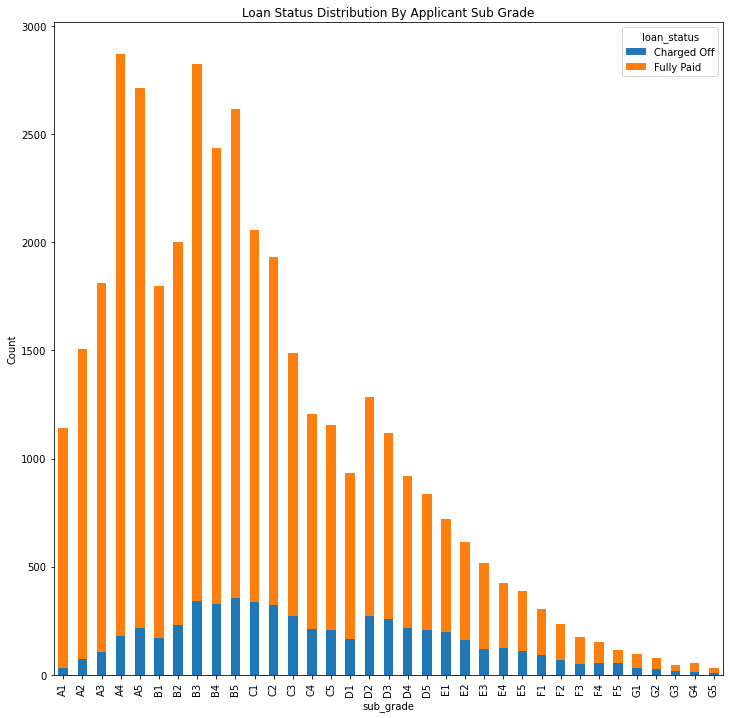

In [587]:
## sub Grade

df_loan.groupby("sub_grade")["loan_status"].value_counts().unstack().plot.bar(stacked = True, figsize = (12,12))
plt.title('Loan Status Distribution By Applicant Sub Grade')
plt.ylabel('Count')
plt.show()

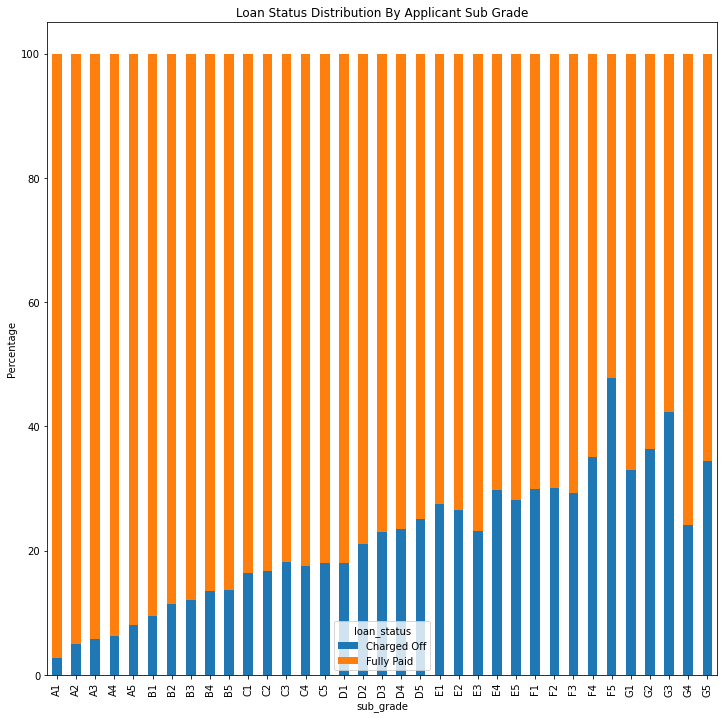

In [603]:
temp = df_loan.groupby(['sub_grade'])['loan_status'].value_counts().unstack()
temp = temp.divide(temp.sum(axis=1) / 100, axis=0)
temp.plot(kind="bar", stacked=True, figsize = (12,12))
plt.title('Loan Status Distribution By Applicant Sub Grade')
plt.ylabel('Percentage')
plt.show()

<b><u>Observations : </b></u>  
Sub grade gives a similar indication as grade. As the grade increase from 'A' to 'G', charged off rate increases.
Within same grade say A, A1 is better than A2,A3,A4,A5 .

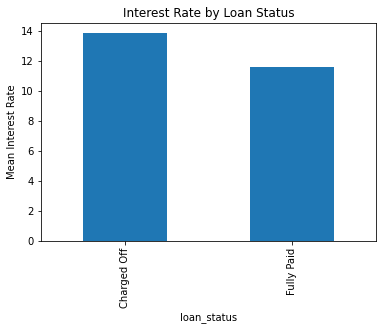

In [374]:
## Intrest rate (int_rate, int_rate_bins)

df_loan.groupby("loan_status")["int_rate"].mean().plot.bar()
plt.ylabel('Mean Interest Rate')
plt.title('Interest Rate by Loan Status')
plt.show()

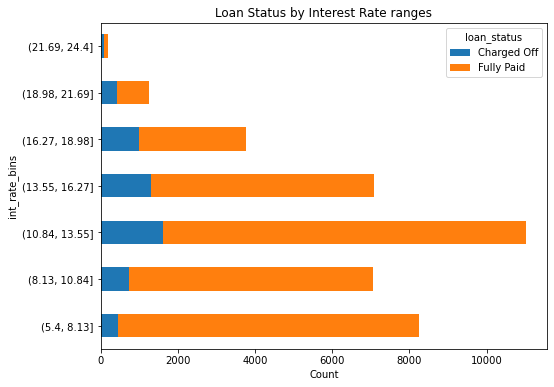

In [375]:
df_loan.groupby(df_loan.int_rate_bins)["loan_status"].value_counts().unstack().plot.barh(stacked = True, figsize = (8,6))
plt.title('Loan Status by Interest Rate ranges')
plt.xlabel('Count')
plt.show()

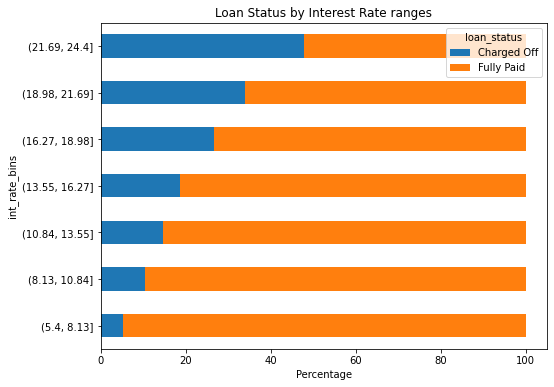

In [376]:
temp = df_loan.groupby([df_loan.int_rate_bins])['loan_status'].value_counts().unstack()
temp = temp.divide(temp.sum(axis=1) / 100, axis=0)
temp.plot(kind="barh", stacked=True, figsize = (8,6))
plt.title('Loan Status by Interest Rate ranges')
plt.xlabel('Percentage')
plt.show()

<b><u>Observations : </b></u>  
As the above bar charts indicate, as the interest rate increases, the charge off proportion increases too

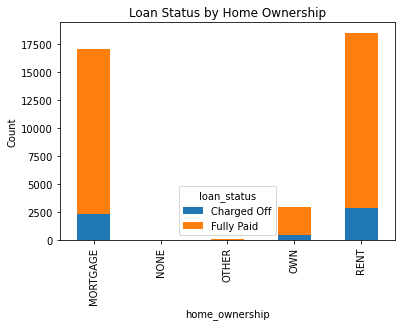

In [380]:
## Home ownership (home_ownership)

df_loan.groupby("home_ownership")["loan_status"].value_counts().unstack().plot.bar(stacked = True)
plt.title('Loan Status by Home Ownership')
plt.ylabel('Count')
plt.show()

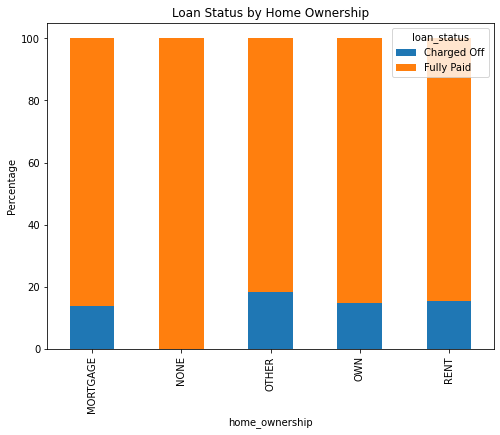

In [379]:
temp = df_loan.groupby(["home_ownership"])['loan_status'].value_counts().unstack()
temp = temp.divide(temp.sum(axis=1) / 100, axis=0)
temp.plot(kind="bar", stacked=True, figsize = (8,6))
plt.title('Loan Status by Home Ownership')
plt.ylabel('Percentage')
plt.show()

<b><u>Observations : </b></u>  
The proportion of charged off to total loans is almost same for every type of home ownership indicating that home ownership is not a major driving factor for loan status

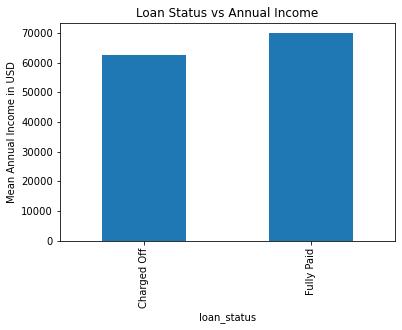

In [382]:
## Annual Income (annual_inc, annual_inc_bins)

df_loan.groupby("loan_status")["annual_inc"].mean().plot.bar()
plt.title('Loan Status vs Annual Income')
plt.ylabel('Mean Annual Income in USD')
plt.show()

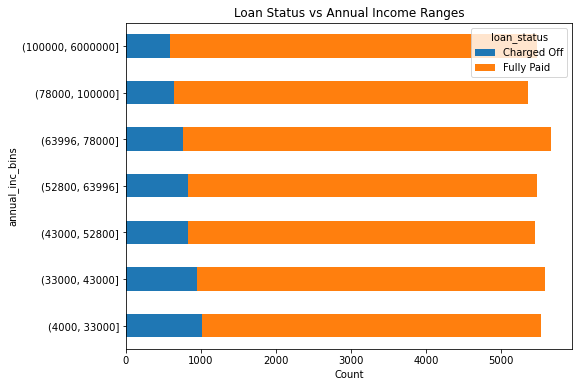

In [384]:
df_loan.groupby(df_loan.annual_inc_bins)["loan_status"].value_counts().unstack().plot.barh(stacked = True, figsize = (8,6))
plt.title('Loan Status vs Annual Income Ranges')
plt.xlabel('Count')
plt.show()

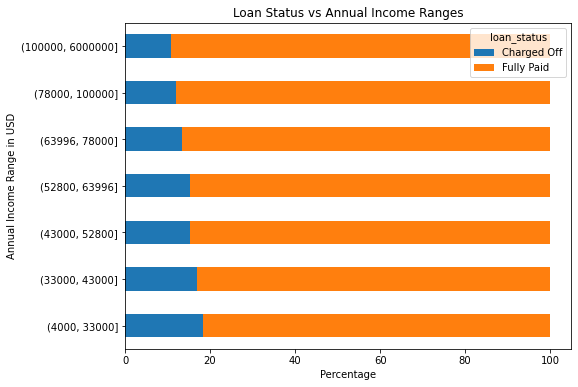

In [388]:
temp = df_loan.groupby([df_loan.annual_inc_bins])['loan_status'].value_counts().unstack()
temp = temp.divide(temp.sum(axis=1) / 100, axis=0)
temp.plot(kind="barh", stacked=True, figsize = (8,6))
plt.title('Loan Status vs Annual Income Ranges')
plt.xlabel('Percentage')
plt.ylabel('Annual Income Range in USD')
plt.show()

<b><u>Observations : </b></u>  
The above bar graphs clearly suggest that as the annual income decreases, the charged off proportion increases.So higher the income of the applicant, it's better.

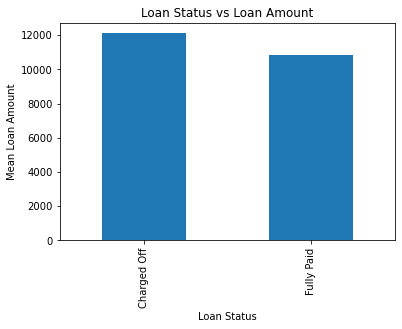

In [387]:
## Loan amount (loan_amnt, loan_amnt_bins)

df_loan.groupby("loan_status")["loan_amnt"].mean().plot.bar()
plt.title('Loan Status vs Loan Amount')
plt.ylabel('Mean Loan Amount')
plt.xlabel('Loan Status')

plt.show()

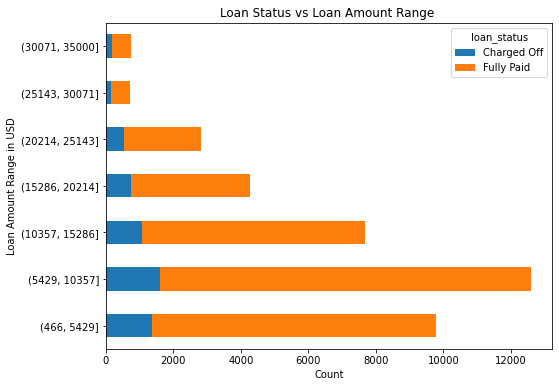

In [389]:
df_loan.groupby(df_loan.loan_amnt_bins)["loan_status"].value_counts().unstack().plot.barh(stacked = True, figsize = (8,6))
plt.title('Loan Status vs Loan Amount Range ')
plt.ylabel('Loan Amount Range in USD')
plt.xlabel('Count')
plt.show()

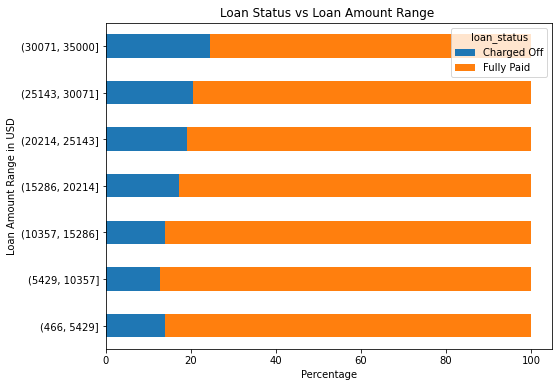

In [390]:
temp = df_loan.groupby([df_loan.loan_amnt_bins])['loan_status'].value_counts().unstack()
temp = temp.divide(temp.sum(axis=1) / 100, axis=0)
temp.plot(kind="barh", stacked=True, figsize = (8,6))
plt.title('Loan Status vs Loan Amount Range ')
plt.ylabel('Loan Amount Range in USD')
plt.xlabel('Percentage')
plt.show()

<b><u>Observations : </b></u>  
The above bar graph clearly suggests that as the loan amount increases, the charged of proportion increases

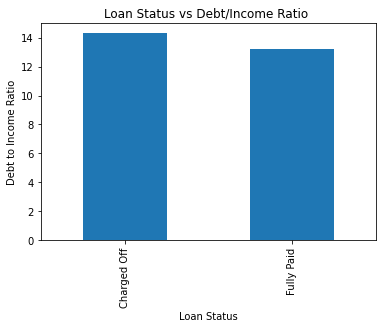

In [391]:
## Debt to income ratio (dti, dti_bins)

df_loan.groupby("loan_status")["dti"].median().plot.bar()
plt.title('Loan Status vs Debt/Income Ratio ')
plt.ylabel('Debt to Income Ratio')
plt.xlabel('Loan Status')
plt.show()

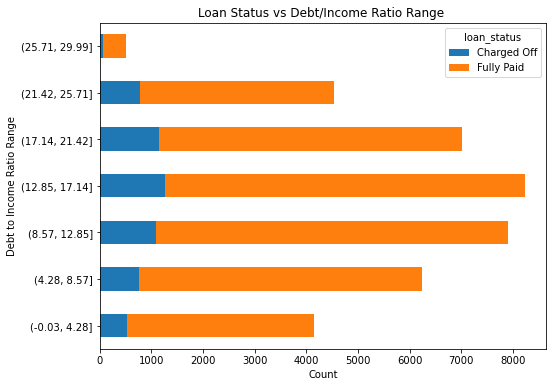

In [392]:
df_loan.groupby(df_loan.dti_bins)["loan_status"].value_counts().unstack().plot.barh(stacked = True, figsize = (8,6))
plt.title('Loan Status vs Debt/Income Ratio Range ')
plt.ylabel('Debt to Income Ratio Range')
plt.xlabel('Count')
plt.show()

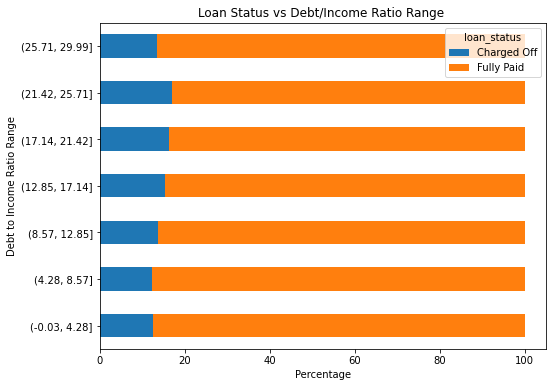

In [393]:
temp = df_loan.groupby([df_loan.dti_bins])['loan_status'].value_counts().unstack()
temp = temp.divide(temp.sum(axis=1) / 100, axis=0)
temp.plot(kind="barh", stacked=True, figsize = (8,6))
plt.title('Loan Status vs Debt/Income Ratio Range ')
plt.ylabel('Debt to Income Ratio Range')
plt.xlabel('Percentage')

plt.show()

<b><u>Observations : </b></u>  
The above bar graph clearly suggests that as the debt to income ratio increases, the charged of proportion increases. 

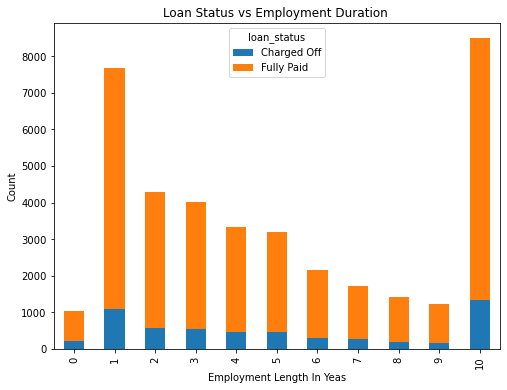

In [394]:
## Employee length (emp_length)

df_loan.groupby("emp_length")["loan_status"].value_counts().unstack().plot.bar(stacked = True, figsize = (8,6))
plt.title('Loan Status vs Employment Duration ')
plt.ylabel('Count')
plt.xlabel('Employment Length In Yeas')
plt.show()

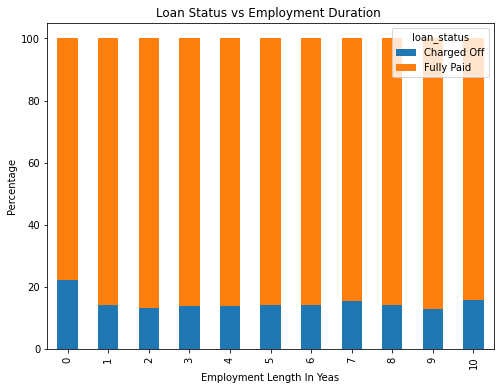

In [395]:
temp = df_loan.groupby(["emp_length"])['loan_status'].value_counts().unstack()
temp = temp.divide(temp.sum(axis=1) / 100, axis=0)
temp.plot(kind="bar", stacked=True, figsize = (8,6))
plt.title('Loan Status vs Employment Duration ')
plt.ylabel('Percentage')
plt.xlabel('Employment Length In Yeas')
plt.show()

<b><u>Observations : </b></u>  
There is no particular correlation between employee length and loan status. However, if and employee doesn't mention his experience, the probability of charged off is slighlty higher

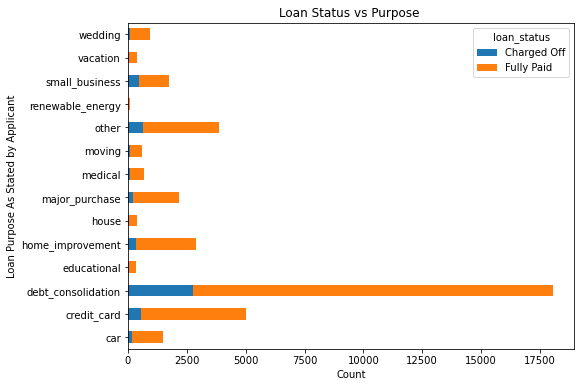

In [396]:
## Purpose

df_loan.groupby("purpose")["loan_status"].value_counts().unstack().plot.barh(stacked = True, figsize = (8,6))
plt.title('Loan Status vs Purpose ')
plt.xlabel('Count')
plt.ylabel('Loan Purpose As Stated by Applicant')
plt.show()

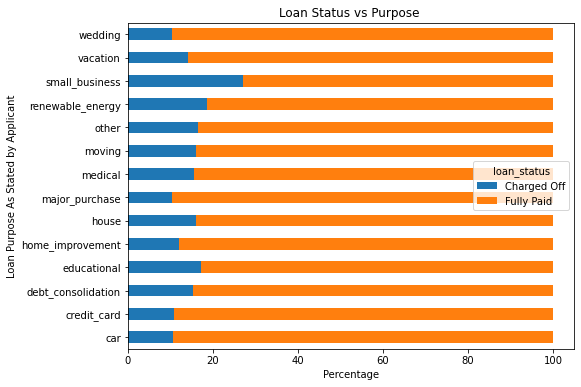

In [397]:
temp = df_loan.groupby(["purpose"])['loan_status'].value_counts().unstack()
temp = temp.divide(temp.sum(axis=1) / 100, axis=0)
temp.plot(kind="barh", stacked=True, figsize = (8,6))
plt.title('Loan Status vs Purpose ')
plt.xlabel('Percentage')
plt.ylabel('Loan Purpose As Stated by Applicant')
plt.show()

<b><u>Observations : </b></u>  
Even if the loans in debt consolidation are greater, the probability of charged off is greater in small_bsuiness followed by renewable_energy. Credit cards and car loan have the lowest probability of charged off 

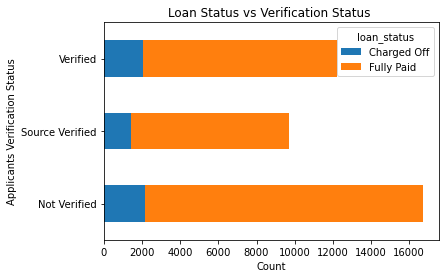

In [399]:
## Verification Status (verification_status)

df_loan.groupby("verification_status")["loan_status"].value_counts().unstack().plot.barh(stacked = True)
plt.title('Loan Status vs Verification Status ')
plt.xlabel('Count')
plt.ylabel('Applicants Verification Status')
plt.show()

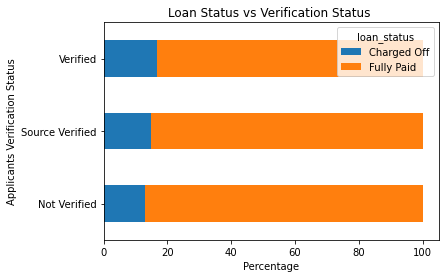

In [400]:
temp = df_loan.groupby(["verification_status"])['loan_status'].value_counts().unstack()
temp = temp.divide(temp.sum(axis=1) / 100, axis=0)
temp.plot(kind="barh", stacked=True)
plt.title('Loan Status vs Verification Status ')
plt.xlabel('Percentage')
plt.ylabel('Applicants Verification Status')
plt.show()

<b><u>Observations : </b></u>  
Given the data,the probability of charged off is greater in 'Verified' loans followed by 'Source verified' and 'Not verified'


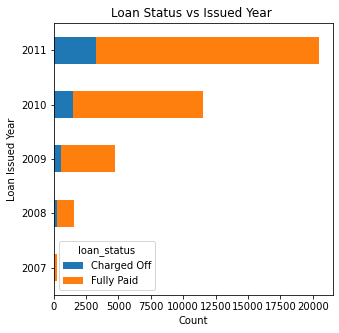

In [605]:
df_loan.groupby("issue_year")["loan_status"].value_counts().unstack().plot.barh(stacked = True)
plt.title('Loan Status vs Issued Year ')
plt.xlabel('Count')
plt.ylabel('Loan Issued Year')
plt.show()

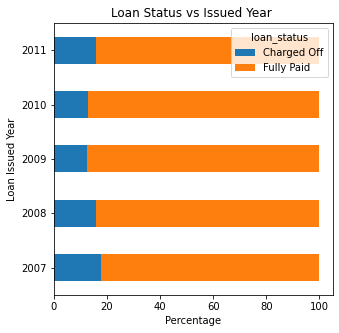

In [606]:
temp = df_loan.groupby(["issue_year"])['loan_status'].value_counts().unstack()
temp = temp.divide(temp.sum(axis=1) / 100, axis=0)
temp.plot(kind="barh", stacked=True)
plt.title('Loan Status vs Issued Year ')
plt.xlabel('Percentage')
plt.ylabel('Loan Issued Year')
plt.show()

<b><u>Observations : </b></u>  
There is a significant growth YOY in the number of loans approved since 2007.
The Charge off % is almost constant despite the significant growth in business. 



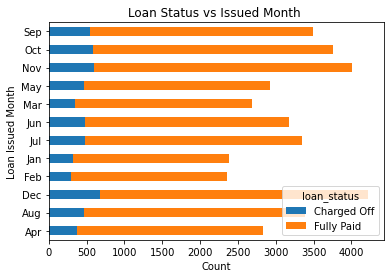

In [432]:
df_loan.groupby("issue_month")["loan_status"].value_counts().unstack().plot.barh(stacked = True)
plt.title('Loan Status vs Issued Month ')
plt.xlabel('Count')
plt.ylabel('Loan Issued Month')
plt.show()

<b><u>Observations : </b></u>  
Jan and Feb has the slowest business.
Nov and Dec months typically has the highest amout of loans disbursed. 
Jan is the start of financial year and Dec is end of financial year.



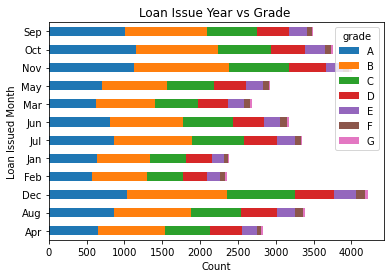

In [459]:
df_loan.groupby("issue_month")["grade"].value_counts().unstack().plot.barh(stacked = True)
plt.figsize = (15,5)
plt.title('Loan Issue Year vs Grade ')
plt.xlabel('Count')
plt.ylabel('Loan Issued Month')
plt.show()

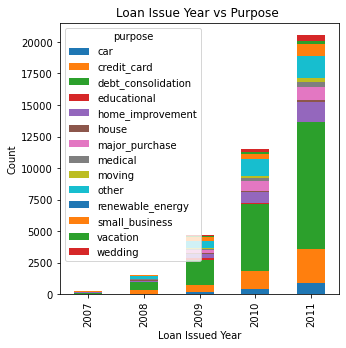

In [589]:
df_loan.groupby("issue_year")["purpose"].value_counts().unstack().plot.bar(stacked = True)
plt.title('Loan Issue Year vs Purpose ')
plt.ylabel('Count')
plt.xlabel('Loan Issued Year')

plt.show()

<b><u>Observations : </b></u>  

Over the years, majority of the business growth has come from debt consolidation and credit card



###### As the segmented univariate analysis suggests, primary drivers for loan status are term, grade, sub_grade, annual income, int_rate,purpose, and loan amount. Other factors such as verification status, purpose, dti are the secondary drivers for loan status

<b> <font size = "10" > Bivariate Analysis </font> </b>

In [325]:
## Against term and loan status

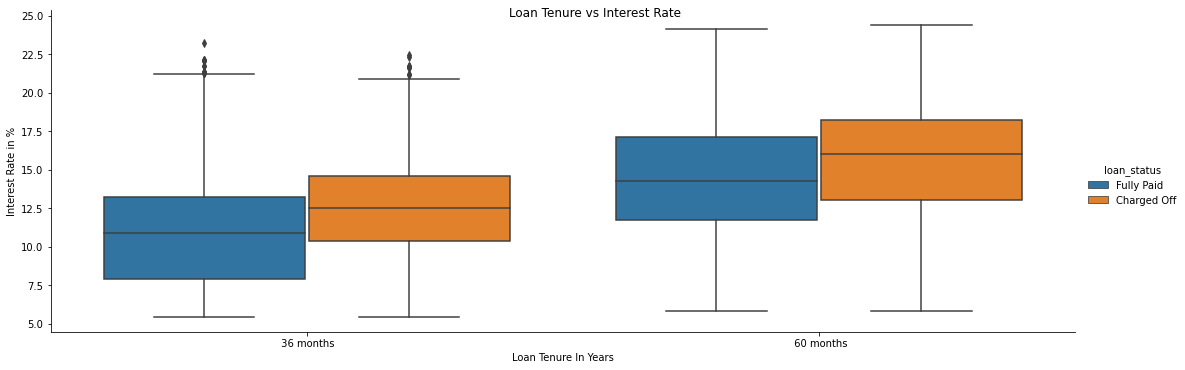

In [406]:
plot = sns.catplot(x="term", y="int_rate",
                hue="loan_status",
                data=df_loan, kind="box",
                height=5, aspect=3);
plot.fig.suptitle('Loan Tenure vs Interest Rate')
plt.xlabel('Loan Tenure In Years')
plt.ylabel('Interest Rate in %')
plt.show()

<b><u>Observations : </b></u>  
Interest Rate increases with the loan tenure. 


Text(11.232803819444449, 0.5, 'Loan Amount in USD')

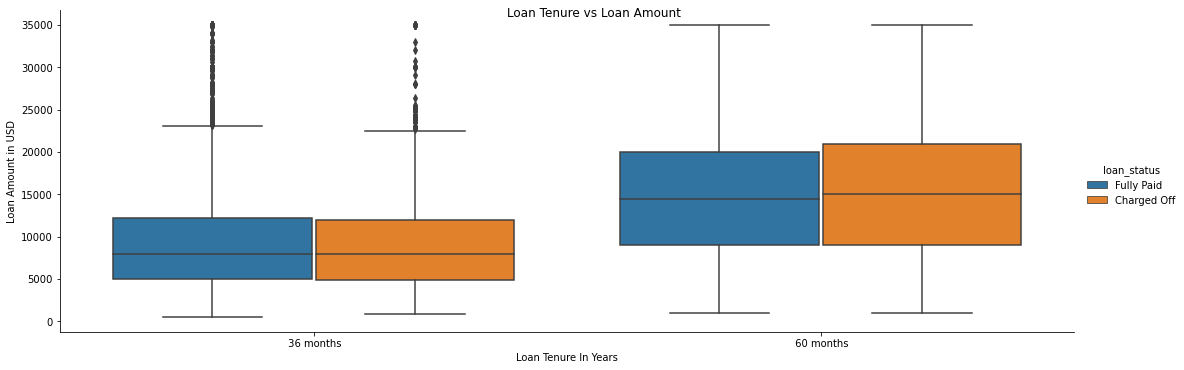

In [407]:
plot = sns.catplot(x="term", y="loan_amnt",
                hue="loan_status",
                data=df_loan, kind="box",
                height=5, aspect=3);
plot.fig.suptitle('Loan Tenure vs Loan Amount')
plt.xlabel('Loan Tenure In Years')
plt.ylabel('Loan Amount in USD')

<b><u>Observations : </b></u>  
Typically, Higher Loan amounts are grantd for longer Tenure (60 months)


In [328]:
## Againse Grade and loan Status

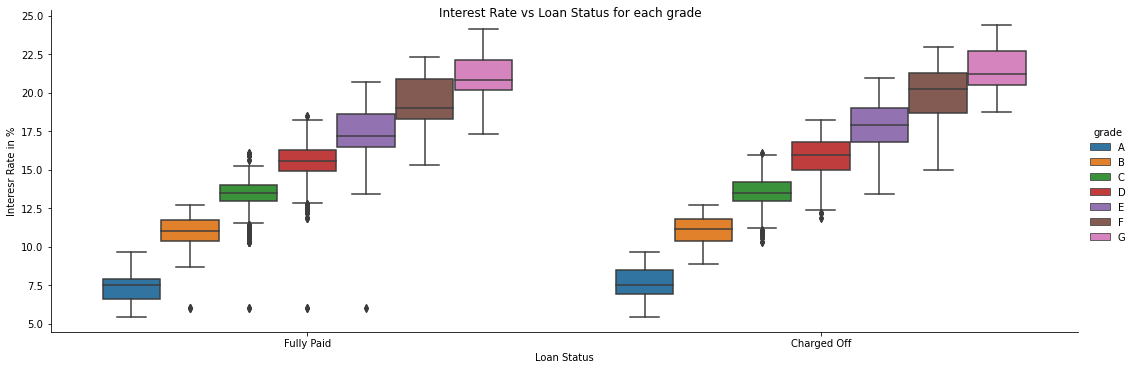

In [409]:
df_loan.sort_values(by='grade',inplace=True)
plot = sns.catplot(x="loan_status", y="int_rate",
                hue="grade",
                data=df_loan, kind="box",
                height=5, aspect=3);
plot.fig.suptitle('Interest Rate vs Loan Status for each grade')
plt.xlabel('Loan Status')
plt.ylabel('Interesr Rate in %')
plt.show()

<b><u>Observations : </b></u>  
As the above cat plot indicates, Grade 'A' has the lowest interest rate and it increases which is highest at Grade 'G' 

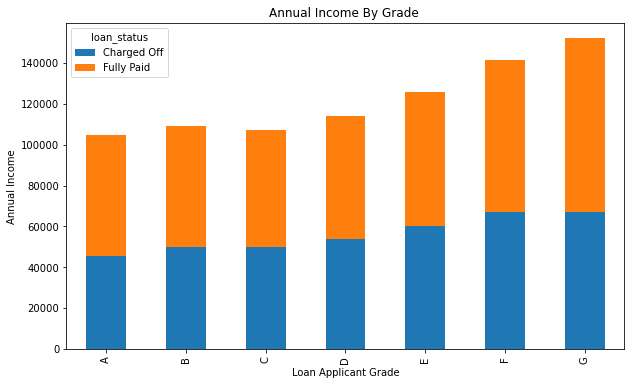

In [445]:
temp = pd.pivot_table(data = df_loan, values="annual_inc", index="grade", columns="loan_status", aggfunc='median')
temp.plot(kind="bar", stacked="True", figsize=[10,6])
plt.title('Annual Income By Grade ')
plt.ylabel('Annual Income')
plt.xlabel('Loan Applicant Grade')
plt.show()

<b><u>Observations : </b></u>  
Even with higher income in grade G, the charge off ratio is higher compared to grade A,B OR C.


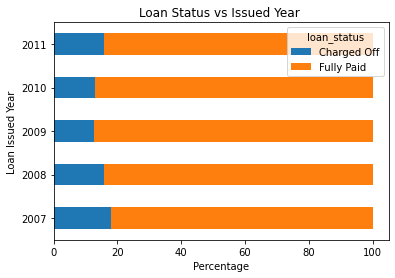

In [448]:
temp = df_loan.groupby(["issue_year"])['loan_status'].value_counts().unstack()
temp = temp.divide(temp.sum(axis=1) / 100, axis=0)
temp.plot(kind="barh", stacked=True)
plt.title('Loan Status vs Issued Year ')
plt.xlabel('Percentage')
plt.ylabel('Loan Issued Year')
plt.show()

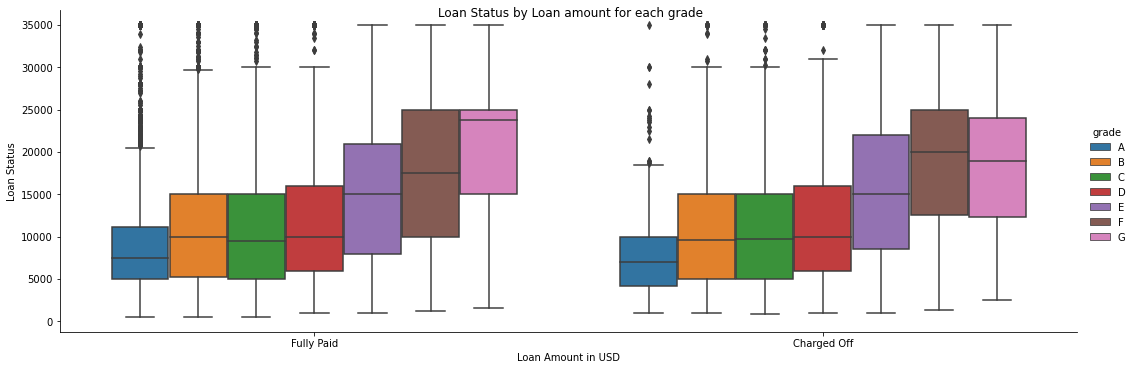

In [415]:
plot = sns.catplot(x="loan_status", y="loan_amnt",
                hue="grade",
                data=df_loan, kind="box",
                height=5, aspect=3);
plot.fig.suptitle('Loan Status by Loan amount for each grade')
plt.xlabel('Loan Amount in USD')
plt.ylabel('Loan Status')
plt.show()

Text(0.5, 0, 'Count')

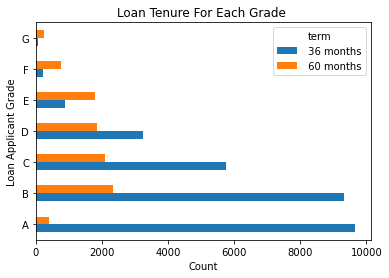

In [413]:
df_loan.groupby("grade")["term"].value_counts().unstack().plot.barh()
plt.title('Loan Tenure For Each Grade ')
plt.ylabel('Loan Applicant Grade')
plt.xlabel('Count')

<b><u>Observations : </b></u>  
As the grade increases, the favourable tenure for the loan is swtiched from 36 months to 60 months

In [333]:
## Against Interest rate bins and loan status

Text(0.5, 6.79999999999999, 'Interest Rate Range')

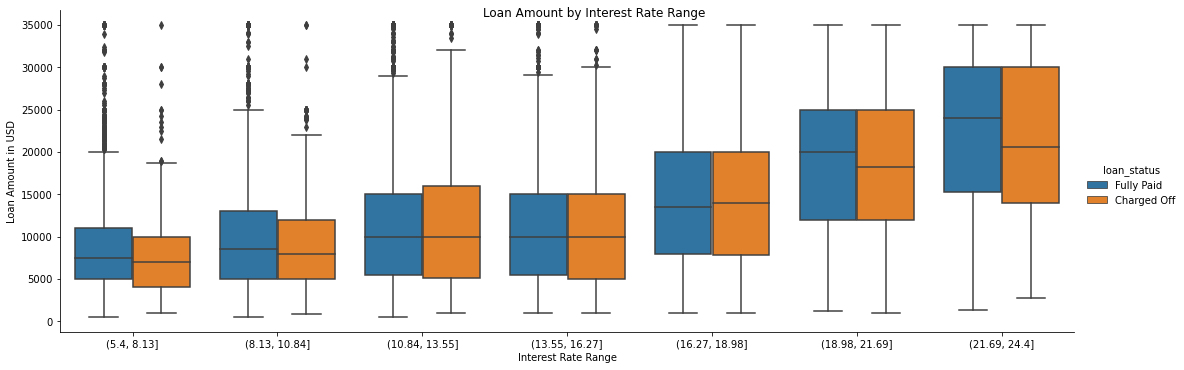

In [414]:
plot = sns.catplot(x='int_rate_bins', y="loan_amnt",
                hue="loan_status",
                data=df_loan, kind="box",
                height=5, aspect=3);
plot.fig.suptitle('Loan Amount by Interest Rate Range')
plt.ylabel('Loan Amount in USD')
plt.xlabel('Interest Rate Range')

<b><u>Observations : </b></u>  
With the increase in loan amount, the interest charged increases keeping the chargedoff/fully paid almost constant. 


In [335]:
## Against sub grade and loan _status

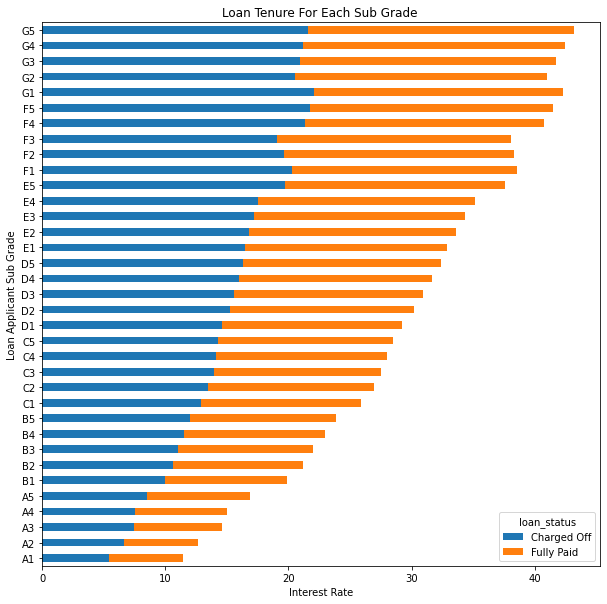

In [416]:
temp = pd.pivot_table(data = df_loan, values="int_rate", index=df_loan.sub_grade, columns="loan_status", aggfunc='median')
temp.plot(kind="barh", stacked="True", figsize=[10,10])
plt.ylabel("Intrest")
plt.title('Loan Tenure For Each Sub Grade ')
plt.ylabel('Loan Applicant Sub Grade')
plt.xlabel('Interest Rate')
plt.show()

<b><u>Observations : </b></u>  
Similar to grade, as the sub grade decrease from 'A' to 'G', interest rate increases.
Lower the grade or subgrade, the charge off proportion increases. 

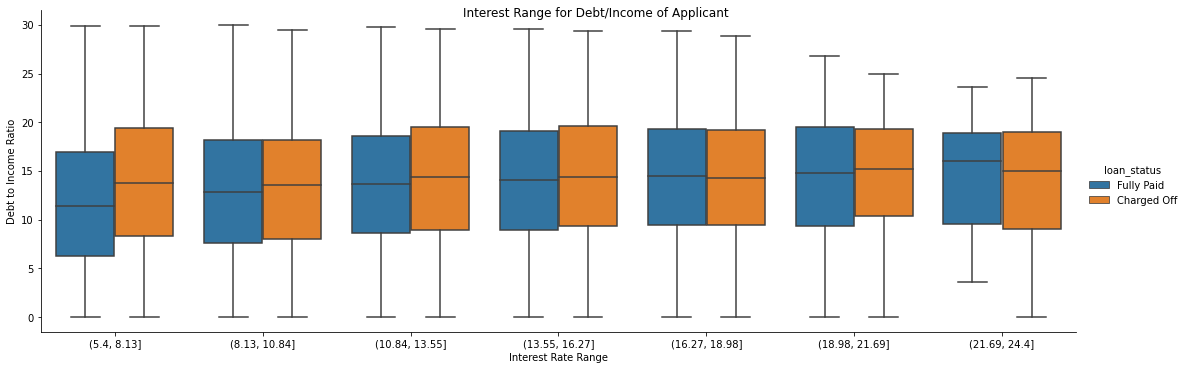

In [417]:
plot = sns.catplot(x='int_rate_bins', y="dti",
                hue="loan_status",
                data=df_loan, kind="box",
                height=5, aspect=3);
plot.fig.suptitle('Interest Range for Debt/Income of Applicant')
plt.ylabel('Debt to Income Ratio')
plt.xlabel('Interest Rate Range')
plt.show()

<b><u>Observations : </b></u> 
DTI has slight impact on the final outcome of the loan. 


Text(11.232803819444449, 0.5, 'Loan Amount in USD')

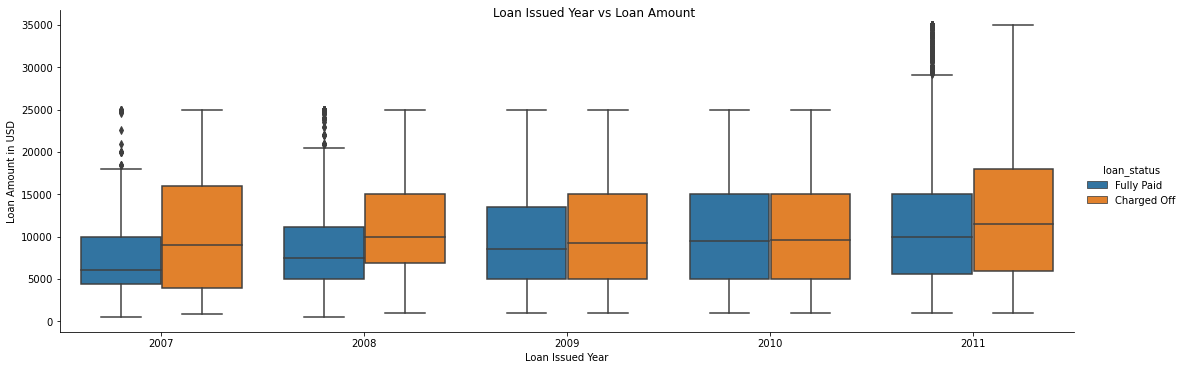

In [433]:
plot = sns.catplot(x="issue_year", y="loan_amnt",
                hue="loan_status",
                data=df_loan, kind="box",
                height=5, aspect=3);
plot.fig.suptitle('Loan Issued Year vs Loan Amount')
plt.xlabel('Loan Issued Year')
plt.ylabel('Loan Amount in USD')

Text(9.52616319444445, 0.5, 'Employment Length In Years')

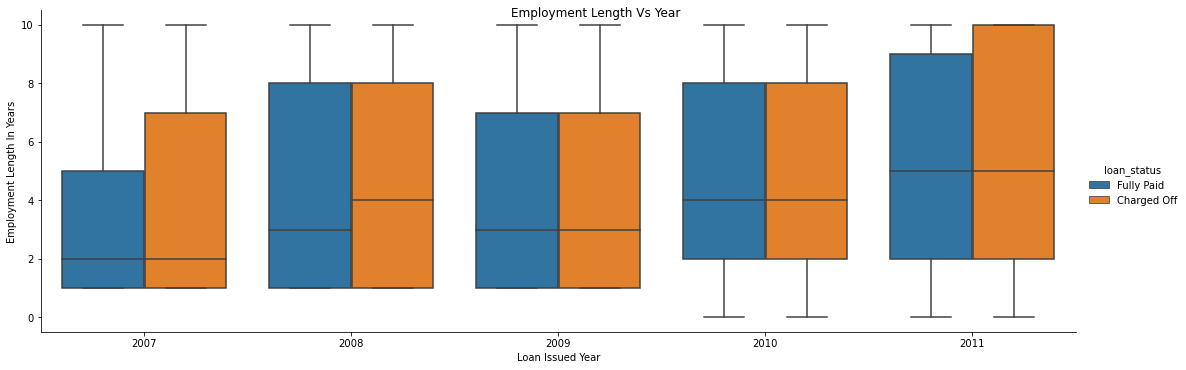

In [479]:
plot = sns.catplot(x="issue_year", y="emp_length",
                hue="loan_status",
                data=df_loan, kind="box",
                height=5, aspect=3);
plot.fig.suptitle('Employment Length Vs Year')
plt.xlabel('Loan Issued Year')
plt.ylabel('Employment Length In Years')

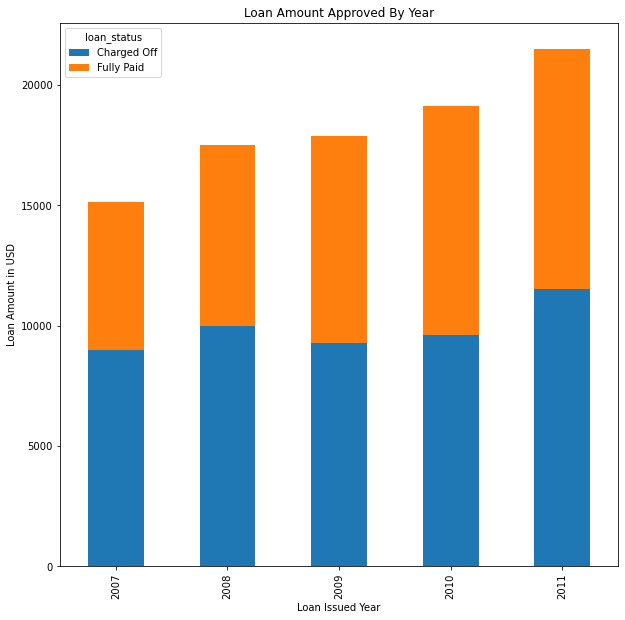

In [419]:
temp = pd.pivot_table(data = df_loan, values="loan_amnt", index=df_loan.issue_year, columns="loan_status", aggfunc='median')
temp.plot(kind="bar", stacked="True", figsize=[10,10])

plt.title('Loan Amount Approved By Year')
plt.ylabel('Loan Amount in USD')
plt.xlabel('Loan Issued Year')
plt.show()

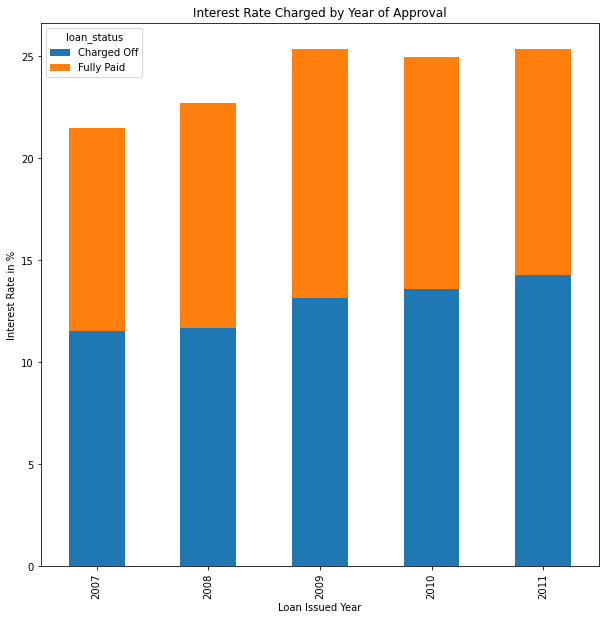

In [420]:
temp = pd.pivot_table(data = df_loan, values="int_rate", index=df_loan.issue_year, columns="loan_status", aggfunc='median')
temp.plot(kind="bar", stacked="True", figsize=[10,10])

plt.title('Interest Rate Charged by Year of Approval')
plt.ylabel('Interest Rate in %')
plt.xlabel('Loan Issued Year')
plt.show()

<b><u>Observations : </b></u>  
Over the years 2007-2011, larger number of loans are disbursed at higher interest rates.


Text(8.921536458333335, 0.5, 'Count')

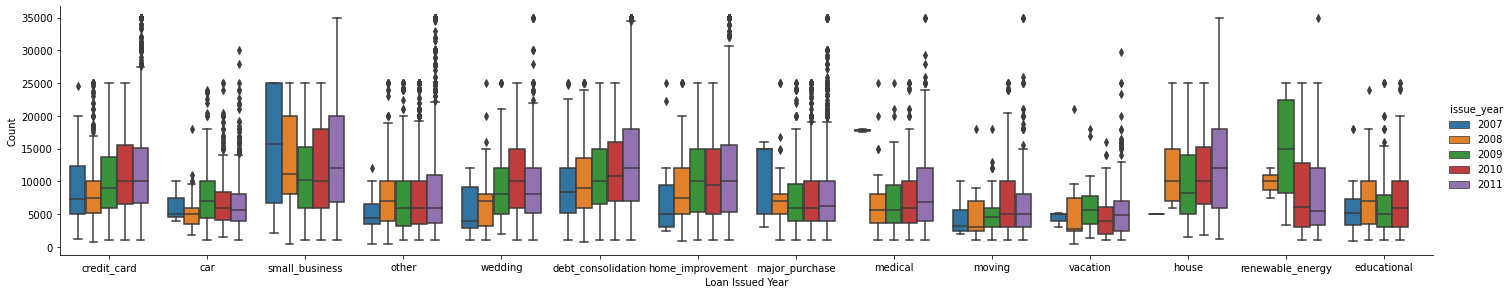

In [592]:
g = sns.catplot(x="purpose", y="loan_amnt",
                hue="issue_year",
                data=df_loan, kind="box",
                height=4, aspect=5);
plot.fig.suptitle('Loan Issued Year vs Loan Amount')
plt.xlabel('Loan Issued Year')
plt.ylabel('Count')

Text(8.844622395833333, 0.5, 'DTI')

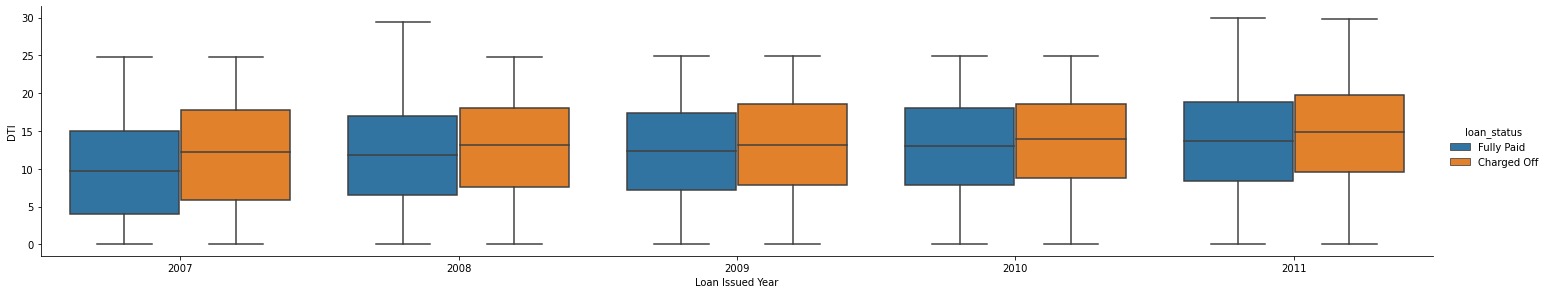

In [593]:
g = sns.catplot(x="issue_year", y="dti",
                hue="loan_status",
                data=df_loan, kind="box",
                height=4, aspect=5);
plot.fig.suptitle('Loan Year Vs DTI')
plt.xlabel('Loan Issued Year')
plt.ylabel('DTI')

<b><u> Observations: </b></u>
Higher amount of loans approved without significantly impacting the chargeoff ratio. 
Overall, loan issued year has a less impact on the outcome of the loan.


In [441]:
df_loan['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

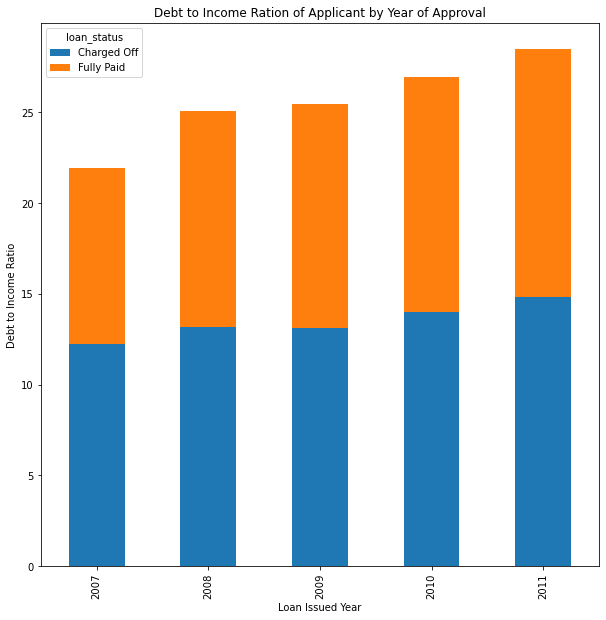

In [422]:
temp = pd.pivot_table(data = df_loan, values="dti", index=df_loan.issue_year, columns="loan_status", aggfunc='median')
temp.plot(kind="bar", stacked="True", figsize=[10,10])

plt.title('Debt to Income Ration of Applicant by Year of Approval')
plt.ylabel('Debt to Income Ratio')
plt.xlabel('Loan Issued Year')
plt.show()

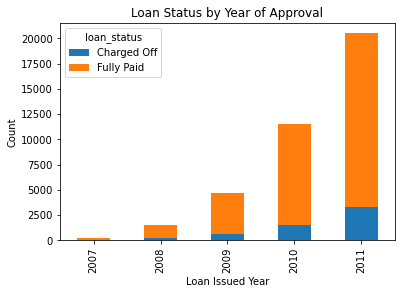

In [423]:
df_loan.groupby('issue_year')['loan_status'].value_counts().unstack().plot.bar(stacked = True)
plt.title('Loan Status by Year of Approval')
plt.ylabel('Count')
plt.xlabel('Loan Issued Year')
plt.show()

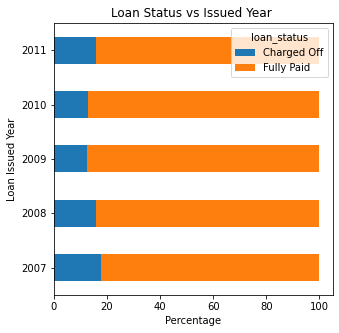

In [602]:
temp = df_loan.groupby(["issue_year"])['loan_status'].value_counts().unstack()
temp = temp.divide(temp.sum(axis=1) / 100, axis=0)
temp.plot(kind="barh", stacked=True)
plt.title('Loan Status vs Issued Year ')
plt.xlabel('Percentage')
plt.ylabel('Loan Issued Year')
plt.show()

<b><u>Observations : </b></u>  
Yeah 2009 and 2010 has slightly lesses proportion of loans charged off. 


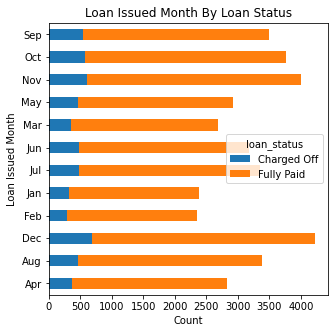

In [594]:
df_loan.groupby("issue_month")["loan_status"].value_counts().unstack().plot.barh(stacked = True)
plt.title('Loan Issued Month By Loan Status')
plt.ylabel('Loan Issued Month')
plt.xlabel('Count')
plt.show()

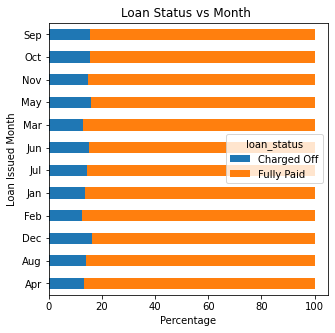

In [601]:
temp = df_loan.groupby(["issue_month"])['loan_status'].value_counts().unstack()
temp = temp.divide(temp.sum(axis=1) / 100, axis=0)
temp.plot(kind="barh", stacked=True)
plt.title('Loan Status vs Month ')
plt.xlabel('Percentage')
plt.ylabel('Loan Issued Month')
plt.show()

<b><u>Observations : </b></u>  
The Q1 JAN,FEB and MARCH have slighly lower charge off ratio compared to other months.


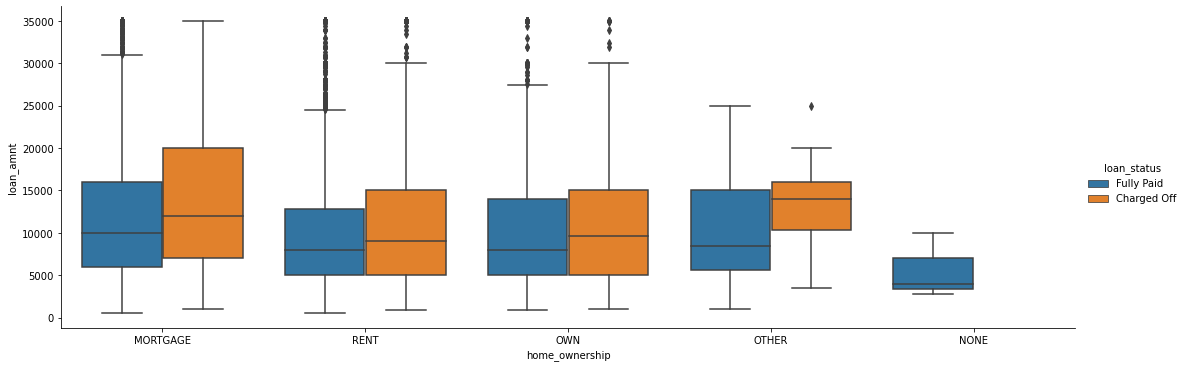

In [444]:
sns.catplot(x='home_ownership', y="loan_amnt",
                hue="loan_status",
                data=df_loan, kind="box",
                height=5, aspect=3)
plt.show()

<b><u>Observations : </b></u>  
Home ownership makes a small impact overall on the final loan status.
Applicants on mortgage and Rent are getting loans on higher amounts. 
People who do not have any status(NONE), get very small amount of money as loan and there are no chargeoffs.


# Summary


###   Primary Factos that impact the loan outcome.
1. Term of 60 months have higher probability of loan getting charged off. 
2. Grade of the applicant have a high impact of loan outcome.
3. Grade A has highest probability that loan will be fully paid and grade G has the lowest.
4.  Higher Interest rate increases the chances of loan getting charged off. 
5.  Loan Purpose mentioned by applicant impacts the outcome. 
      a. Small business is the riskiest loan and has higher probability of getting charged off.
      b. Credit card and major purchases have higher chances that the applicant fully pay back the  loan. 
6.  Higher Loan amount increases the chances of charged off. 
7.  Annual income of the applicant is another factor that impacts the outcome.Higher annual income leads to better chances of loan getting paid in full.



### Secondary Factors that impact the loan outcome.

1. Loan issued in months Nov,Dec have slighly higher probability of getting charged off compared to other months. 
2. Applicants having verified status have higher probability of charged off. 
3. Higher DTI(Debt to Income Ratio) have slightly higher probability of loan getting charged off. 
 









        
        